<a href="https://www.kaggle.com/code/ceosricharan/21bd5a6604-weather-cnn?scriptVersionId=113341522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))0

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd 
from PIL import Image

In [3]:
def loadimg(path):
    imgs=[]
    label=[]
    l1=os.listdir(path)
    for i in l1:
        if(i!="alien_test" and i!="test.csv"):
            l2=os.listdir(path+"/"+i)
            for j in l2:
                img=Image.open(path+i+"/"+j).convert('RGB')
                img=img.resize(size=(28,28))
                #img=img.convert("L")
                img=np.array(img,dtype=np.float16)/255
                imgs.append(np.array(img))
                label.append(i)
                del img
    return np.array(imgs),label

In [4]:
x,y=loadimg("../input/multiclass-weather-dataset/dataset/")

In [5]:
x.shape

(1500, 28, 28, 3)

In [6]:
len(y)

1500

In [7]:
t=pd.Series(y,dtype="category")

In [8]:
t

0       cloudy
1       cloudy
2       cloudy
3       cloudy
4       cloudy
         ...  
1495     rainy
1496     rainy
1497     rainy
1498     rainy
1499     rainy
Length: 1500, dtype: category
Categories (5, object): ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

In [9]:
t.value_counts()

sunrise    350
cloudy     300
foggy      300
rainy      300
shine      250
dtype: int64

In [10]:
t1=t.cat.codes

In [11]:
t1

0       0
1       0
2       0
3       0
4       0
       ..
1495    2
1496    2
1497    2
1498    2
1499    2
Length: 1500, dtype: int8

In [12]:
d=pd.read_csv("../input/multiclass-weather-dataset/dataset/test.csv")
d

,Image_id,labels
0,Cloud_1.png,0
1,Cloud_2.jpg,0
2,Cloud_3.jpeg,0
3,Cloud_4.jpg,0
4,foggy_1.jpg,1
5,foggy_2.jpg,1
6,foggy_3.jpg,1
7,foggy_4.jpg,1
8,foggy_5.jpg,1
9,foggy_6.jpg,1


In [13]:
def loadimg(impath,d):
    images=[]
    labels=[]
    l1=os.listdir(impath)
    for i in d.iterrows():
            img=Image.open(impath+"/"+i[1][0]).convert('RGB')
            #img=img.resize(size=(28,28))
            #img=img.convert('L')
            #images.append(np.array(img))
            img=img.resize(size=(28,28))
            #img=img.convert("L")
            img=np.array(img,dtype=np.float16)/255
            images.append(np.array(img))
            if(i[1][1]==0):
                labels.append("cloudy")
            elif(i[1][1]==1):
                labels.append("foggy")
            elif(i[1][1]==2):
                labels.append("rainy")
            elif(i[1][1]==3):
                labels.append("shine")
            else:
                labels.append("sunrise")
            
            del img
    return np.array(images),labels

In [14]:
xt,yt=loadimg("../input/multiclass-weather-dataset/dataset/alien_test/",d)

In [15]:
xt.shape,len(yt)

((30, 28, 28, 3), 30)

In [16]:
t=pd.Series(yt,dtype="category")

In [17]:
t

0      cloudy
1      cloudy
2      cloudy
3      cloudy
4       foggy
5       foggy
6       foggy
7       foggy
8       foggy
9       foggy
10      foggy
11      foggy
12      foggy
13      foggy
14      rainy
15      rainy
16      rainy
17      rainy
18      rainy
19      rainy
20      shine
21      shine
22      shine
23    sunrise
24    sunrise
25    sunrise
26    sunrise
27    sunrise
28    sunrise
29    sunrise
dtype: category
Categories (5, object): ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

In [18]:
t.value_counts()

foggy      10
sunrise     7
rainy       6
cloudy      4
shine       3
dtype: int64

In [19]:
t2=t.cat.codes
t2

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
dtype: int8

In [20]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [21]:
model=Sequential()
model.add(Conv2D(32,activation="relu",kernel_size=3,input_shape=(x.shape[1:])))
model.add(Conv2D(64,activation="relu",kernel_size=3,))
model.add(Conv2D(128,activation="relu",kernel_size=3,))
model.add(Conv2D(256,activation="relu",kernel_size=3,))
model.add(Flatten())
model.add(Dense(5,activation="softmax"))
model.summary()

2022-12-09 05:28:30.196632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 05:28:30.197669: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 05:28:30.341268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 05:28:30.342096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 05:28:30.342869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
flatten (Flatten)            (None, 102400)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 512005    
Total params: 900,421
Trainable params: 900,421
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [23]:
model.fit(x,t1,epochs=15)

2022-12-09 05:28:34.357490: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-12-09 05:28:36.310610: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


47/47 [==============================] - 10s 13ms/step - loss: 1.1500 - accuracy: 0.5433
Epoch 2/15
47/47 [==============================] - 0s 8ms/step - loss: 0.8139 - accuracy: 0.6793
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 0.7683 - accuracy: 0.6893
Epoch 4/15
47/47 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.7340
Epoch 5/15
47/47 [==============================] - 0s 8ms/step - loss: 0.6351 - accuracy: 0.7680
Epoch 6/15
47/47 [==============================] - 0s 8ms/step - loss: 0.5465 - accuracy: 0.8007
Epoch 7/15
47/47 [==============================] - 0s 8ms/step - loss: 0.4634 - accuracy: 0.8333
Epoch 8/15
47/47 [==============================] - 0s 8ms/step - loss: 0.4208 - accuracy: 0.8553
Epoch 9/15
47/47 [==============================] - 0s 9ms/step - loss: 0.4069 - accuracy: 0.8560
Epoch 10/15
47/47 [==============================] - 0s 8ms/step - loss: 0.2969 - accuracy: 0.8987
Epoch 11/15
47/47 [=========

In [24]:
model.evaluate(x,t1)

47/47 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9633


[0.12044297158718109, 0.9633333086967468]

In [25]:
model.evaluate(xt,t2)

1/1 [==============================] - 0s 133ms/step - loss: 1.7609 - accuracy: 0.7000


[1.7609425783157349, 0.699999988079071]

In [26]:
classes = ['cloudy','foggy','rainy','shine','sunrise']

In [27]:
def names(number):
    return classes[number]

In [28]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((28,28)))
    x = x.reshape(1,28,28,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence cloudy


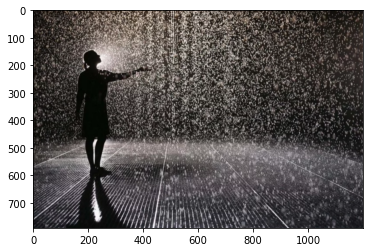

In [29]:
img = Image.open(r"../input/multiclass-weather-dataset/dataset/alien_test/rain_2.png").convert('RGB')
Prediction(img)